#Librarys

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

#Data Preprocessing

In [3]:
path='/content/Abalonedataset.csv'
data=pd.read_csv(path)
data

,Gender,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Age,Gender_g
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5,M
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5,M
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5,F
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5,M
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5,I
...,...,...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5,F
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5,M
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5,M
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5,F


In [9]:
data.isna().sum()

Gender            0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Age               0
Gender_g          0
dtype: int64

In [5]:
data['Length'].count()

4177

#EDA

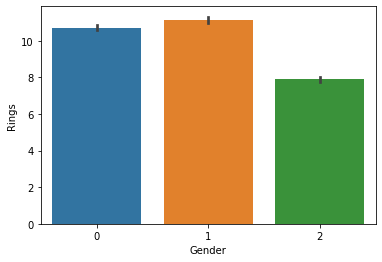

In [10]:
sns.barplot(x="Gender",y="Rings",data=data)

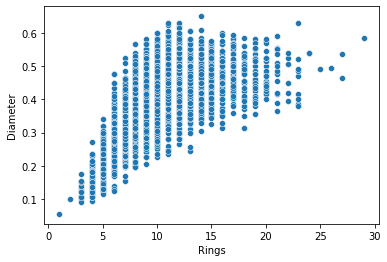

In [11]:
sns.scatterplot(x="Rings",y="Diameter",data=data)

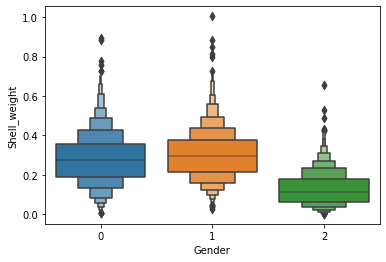

In [12]:
sns.boxenplot(x="Gender",y="Shell_weight",data=data)

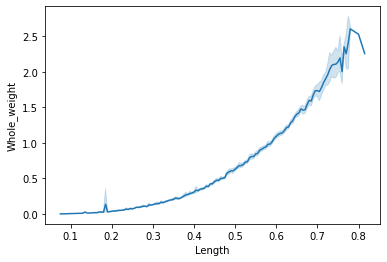

In [14]:
sns.lineplot(x="Length",y="Whole_weight",data=data)

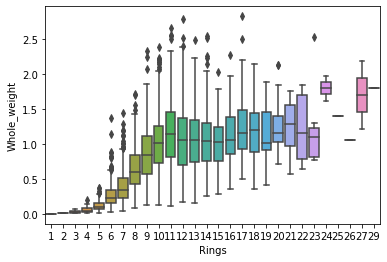

In [15]:
sns.boxplot(x="Rings",y="Whole_weight",data=data)

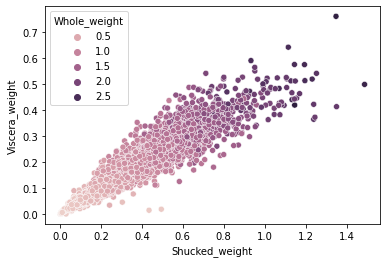

In [16]:
sns.scatterplot(x="Shucked_weight",y="Viscera_weight",data=data,hue="Whole_weight")

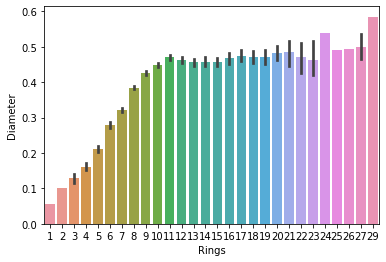

In [17]:
sns.barplot(x="Rings",y="Diameter",data=data)

In [18]:
region_plot = data.groupby('Gender_g')['Gender_g'].count()
region_plot

Gender_g
F    1307
I    1342
M    1528
Name: Gender_g, dtype: int64

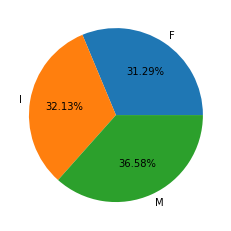

In [19]:
plt.pie(region_plot , labels=region_plot.index, autopct="%.2f%%");
plt.show()

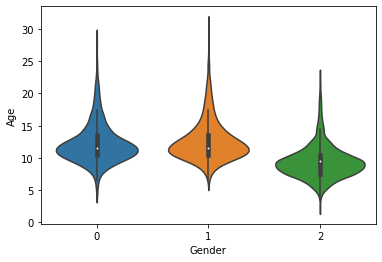

In [20]:
sns.violinplot(x="Gender", y="Age", data=data);

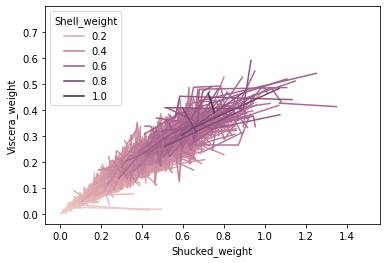

In [21]:
sns.lineplot(x='Shucked_weight', y='Viscera_weight', data=data,hue='Shell_weight');

<BarContainer object of 1000 artists>

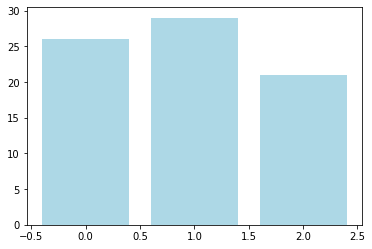

In [22]:
plt.bar(data["Gender"][:1000], data["Rings"][:1000], color="LightBlue")

#Linear Regression

In [23]:
LR = smf.ols(formula='Rings~Diameter+Height+Whole_weight+Shucked_weight+Viscera_weight+Shell_weight+Gender', data=data).fit()
LR.params

Intercept          3.714369
Diameter          11.054384
Height            11.183837
Whole_weight       9.074323
Shucked_weight   -20.135833
Viscera_weight   -10.209289
Shell_weight       8.717142
Gender            -0.389536
dtype: float64

In [25]:
LR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     686.1
Date:                Sat, 17 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:29:48   Log-Likelihood:                -9215.7
No. Observations:                4177   AIC:                         1.845e+04
Df Residuals:                    4169   BIC:                         1.850e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7144      0.265     14.017      0.000       3.195       4.234
Diameter          11.0544      0.986     11.208      0.000       9.121      12.988
Height            11.1838      1.537      7.278      0.000       8.171      14.196
Whole_weight       9.0743      0.727     12.483      0.000       7.649      10.499
Shucked_weight   -20.1358      0.814    -24.734      0.000     -21.732     -18.540
Viscera_weight   -10.2093      1.288     -7.924      0.000     -12.735      -7.683
Shell_weight       8.7171      1.127      7.735      0.000       6.508      10.927
Gender            -0.3895      0.047     -8.352      0.000      -0.481      -0.298
==============================================================================
Omnibus:                      959.512   Durbin-Watson:                   1.422
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2768.195
Skew:                           1.193   Prob(JB):                         0.00
Kurtosis:                       6.196   Cond. No.                         86.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X = data[["Gender","Diameter","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Length"]]
y = data.Rings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
y_pred1 = lm1.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

2.2507864889867832


In [40]:
mae = metrics.mean_absolute_error(y_test, y_pred1)
mse = metrics.mean_squared_error(y_test , y_pred1)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred1)
print(mae)
print(mse)
print(rmse)
print(r2)
print(100-(1.96*rmse))

1.5665677313710098
4.810134094083125
2.1932017905525987
0.5401419883235783
95.70132449051691


In [42]:
X = data[["Gender","Diameter","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Length"]]
y = data.Rings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
y_pred1 = lm1.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

2.172576302053747


In [43]:
mae = metrics.mean_absolute_error(y_test, y_pred1)
mse = metrics.mean_squared_error(y_test , y_pred1)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred1)
print(mae)
print(mse)
print(rmse)
print(r2)
print(100-(1.96*rmse))

1.5642162462039457
4.720087788245536
2.172576302053747
0.558346455554664
95.74175044797465


In [44]:
X = data[["Gender","Diameter","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Length"]]
y = data.Rings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
y_pred1 = lm1.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

2.0825337896412393


In [45]:
mae = metrics.mean_absolute_error(y_test, y_pred1)
mse = metrics.mean_squared_error(y_test , y_pred1)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred1)
print(mae)
print(mse)
print(rmse)
print(r2)
print(100-(1.96*rmse))

1.4986415572175416
4.336946984997501
2.0825337896412393
0.5546629402126935
95.91823377230317


In [46]:
X = data[["Gender","Diameter","Whole_weight","Shucked_weight","Viscera_weight","Shell_weight","Length"]]
y = data.Rings
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lm1 = LinearRegression()
lm1.fit(X_train, y_train)
y_pred1 = lm1.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

2.12220442788544


In [47]:
mae = metrics.mean_absolute_error(y_test, y_pred1)
mse = metrics.mean_squared_error(y_test , y_pred1)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred1)
print(mae)
print(mse)
print(rmse)
print(r2)
print(100-(1.96*rmse))

1.5715010309113024
4.5037516337365675
2.12220442788544
0.5126507203030766
95.84047932134453


#Neural Network 

In [27]:
data1=data[{'Gender','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings'}]
data1

,Shucked_weight,Length,Diameter,Height,Viscera_weight,Gender,Rings,Whole_weight,Shell_weight
0,0.2245,0.455,0.365,0.095,0.1010,0,15,0.5140,0.1500
1,0.0995,0.350,0.265,0.090,0.0485,0,7,0.2255,0.0700
2,0.2565,0.530,0.420,0.135,0.1415,1,9,0.6770,0.2100
3,0.2155,0.440,0.365,0.125,0.1140,0,10,0.5160,0.1550
4,0.0895,0.330,0.255,0.080,0.0395,2,7,0.2050,0.0550
...,...,...,...,...,...,...,...,...,...
4172,0.3700,0.565,0.450,0.165,0.2390,1,11,0.8870,0.2490
4173,0.4390,0.590,0.440,0.135,0.2145,0,10,0.9660,0.2605
4174,0.5255,0.600,0.475,0.205,0.2875,0,9,1.1760,0.3080
4175,0.5310,0.625,0.485,0.150,0.2610,1,10,1.0945,0.2960


In [28]:
x= data1.drop('Rings',axis=1)
y = data1['Rings']
x.head

<bound method NDFrame.head of       Shucked_weight  Length  Diameter  Height  Viscera_weight  Gender  \
0             0.2245   0.455     0.365   0.095          0.1010       0   
1             0.0995   0.350     0.265   0.090          0.0485       0   
2             0.2565   0.530     0.420   0.135          0.1415       1   
3             0.2155   0.440     0.365   0.125          0.1140       0   
4             0.0895   0.330     0.255   0.080          0.0395       2   
...              ...     ...       ...     ...             ...     ...   
4172          0.3700   0.565     0.450   0.165          0.2390       1   
4173          0.4390   0.590     0.440   0.135          0.2145       0   
4174          0.5255   0.600     0.475   0.205          0.2875       0   
4175          0.5310   0.625     0.485   0.150          0.2610       1   
4176          0.9455   0.710     0.555   0.195          0.3765       0   

      Whole_weight  Shell_weight  
0           0.5140        0.1500  
1          

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=42)
y_test

866      9
1483     8
599     16
1702     9
670     14
        ..
532     12
3417     9
1505     8
2245     9
2428    10
Name: Rings, Length: 1045, dtype: int64

In [ ]:
tf.random.set_seed(42)

# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(3),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 1250, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

33/33 [==============================] - 0s 803us/step - loss: 1.5351 - mae: 1.5351


[1.5350645780563354, 1.5350645780563354]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 63        
                                                                 
 dense_6 (Dense)             (None, 5)                 40        
                                                                 
 dense_7 (Dense)             (None, 3)                 18        
                                                                 
 dense_8 (Dense)             (None, 2)                 8         
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 132
Trainable params: 132
Non-trainable params: 0
_________________________________________________________________


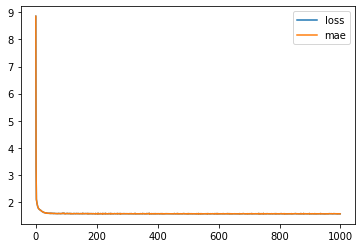

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=42)
y_test

866      9
1483     8
599     16
1702     9
670     14
        ..
162     12
2206     5
3980     7
3075    11
2148     8
Name: Rings, Length: 1254, dtype: int64

In [ ]:
# STEP1: Creating the model

model= tf.keras.Sequential([
                            tf.keras.layers.Dense(7),
                            tf.keras.layers.Dense(5),
                            tf.keras.layers.Dense(1)
])

# STEP2: Compiling the model   # optimizer casn be SGD, Adam

model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.SGD(),
              metrics= ["mae"])

# STEP3: Fit the model

history= model.fit(x_train, y_train, epochs= 500, verbose=0)

In [ ]:
model.evaluate(x_test, y_test)

40/40 [==============================] - 0s 1ms/step - loss: 1.5561 - mae: 1.5561


[1.556076169013977, 1.556076169013977]

#Bagging

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
bgr = BaggingRegressor(n_estimators=90, random_state=1)
bgr.fit(x_train, y_train)

BaggingRegressor(n_estimators=90, random_state=1)

In [ ]:
bgr.score(x_test, y_test)

0.535689218125446

In [ ]:
mae = metrics.mean_absolute_error(y_test, model.predict(x_test)) 
print(mae)

2.537157078850572


# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Create adaboost classifer object
abc = AdaBoostRegressor(n_estimators=100,
                         learning_rate=0.6)
# Train Adaboost Classifer
model = abc.fit(x_train, y_train)
model.score(x_test, y_test)

0.13339006013322152

In [ ]:
mae = metrics.mean_absolute_error(y_test, model.predict(x_test)) 
print(mae)

2.676968732334342


In [ ]:
#gradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.4,max_depth=1,
 random_state=0).fit(x_train, y_train)
reg.score(x_test, y_test)

0.5121959391299115

In [ ]:
mae = metrics.mean_absolute_error(y_test, reg.predict(x_test)) 
print(mae)

1.6569707847160557


In [ ]:
#XgradientBoosting
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=42)
y_test

866      9
1483     8
599     16
1702     9
670     14
        ..
3604     8
3223     8
2350    12
3534     6
845      9
Name: Rings, Length: 1671, dtype: int64

In [ ]:
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)

[14:53:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
mae = metrics.mean_absolute_error(y_test, xgbr.predict(x_test)) 
print(mae)

1.5493966219027124


In [ ]:
xgbr.score(x_test, y_test)

0.5274534521016514